In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
if 'seaborn-whitegrid' in plt.style.available:
    plt.style.use('seaborn-whitegrid')
else:
    plt.style.use('seaborn-v0_8-whitegrid')
    
sns.set_palette('viridis')
%matplotlib inline

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

---
---

# 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [3]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


---

In [4]:
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


---

In [5]:
column_names = ["Global Average Temperature (°C)", "CO2 Concentration (ppm)", "Sea Level Rise (mm)", "Arctic Ice Area (million km²)"]

In [6]:
df = df.groupby('Year').mean().reset_index()
df.round(3)

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.507,350.373,150.408,8.979
1,1901,14.485,349.757,150.549,8.947
2,1902,14.476,349.300,152.175,9.036
3,1903,14.492,349.644,150.138,9.057
4,1904,14.494,349.537,150.667,8.991
...,...,...,...,...,...
119,2019,14.500,348.642,151.020,9.015
120,2020,14.497,350.022,150.220,9.054
121,2021,14.501,350.150,150.187,8.969
122,2022,14.495,350.493,148.858,8.942


---
---

# 2. Univariate Analysis

Analyze each climate variable independently.

In [7]:
# Count - Mean - Standard Deviation - Minimum - Q1 - Median - Q3 - Maximum for all columns except Year column:
print("Description: ")
display(df[["Global Average Temperature (°C)", "CO2 Concentration (ppm)", "Sea Level Rise (mm)", "Arctic Ice Area (million km²)"]].describe().round(3))


# Skewness for all columns except Year column:
skewness_df = df[["Global Average Temperature (°C)", "CO2 Concentration (ppm)", "Sea Level Rise (mm)", "Arctic Ice Area (million km²)"]].skew().to_frame().T
skewness_df.index = ['skew']
display(skewness_df.round(3))


Description: 


,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
count,124.000,124.000,124.000,124.000
mean,14.500,350.029,149.989,9.001
std,0.010,0.457,1.032,0.038
min,14.475,348.642,148.052,8.893
25%,14.493,349.692,149.207,8.979
50%,14.499,350.022,149.918,8.998
75%,14.505,350.367,150.560,9.028
max,14.528,351.003,152.672,9.102


,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
skew,0.219,-0.068,0.414,-0.118


---

## Box Plot

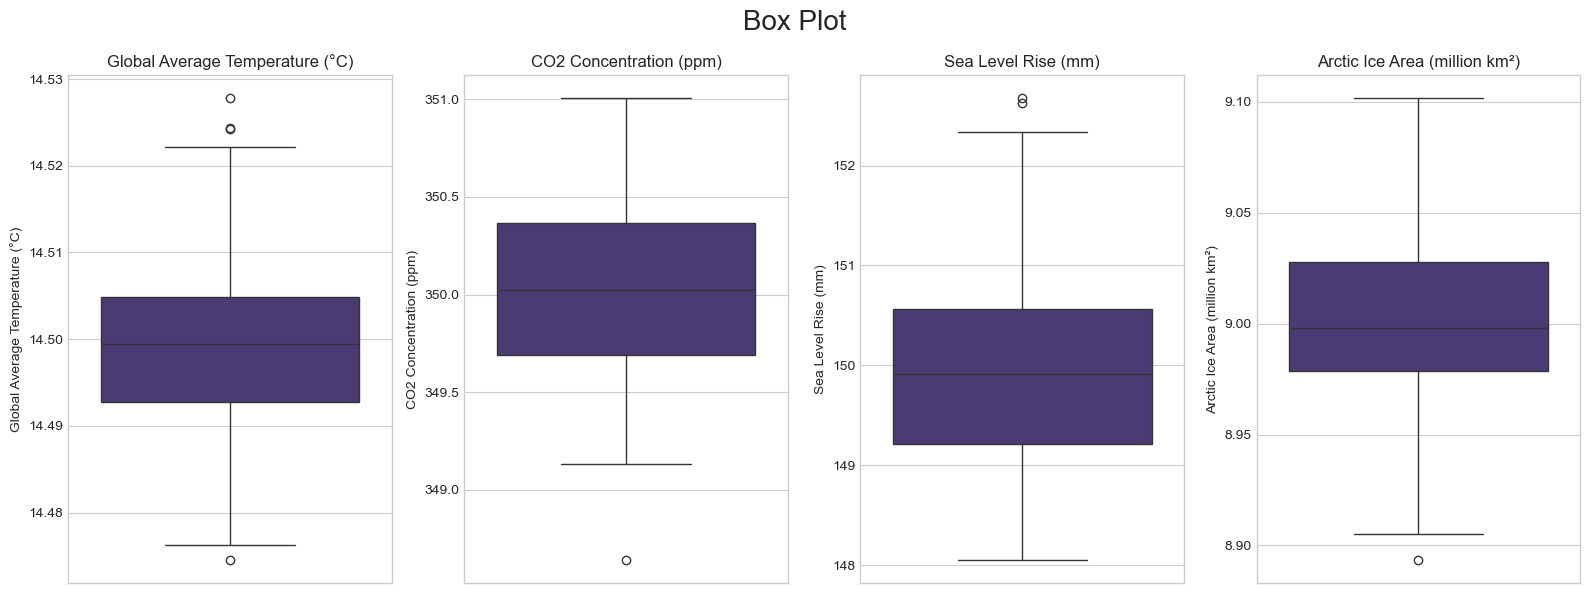

In [8]:
# Box plot:

df_selected = df.drop(columns='Year')
num_columns = df_selected.shape[1]

fig, axes = plt.subplots(1, num_columns, figsize=(16, 6))

for i, column in enumerate(df_selected.columns):
    sns.boxplot(data=df_selected[column], ax=axes[i])
    axes[i].set_title(column)

plt.suptitle("Box Plot", fontsize=20)
plt.tight_layout()
plt.show()

## Violin Plot

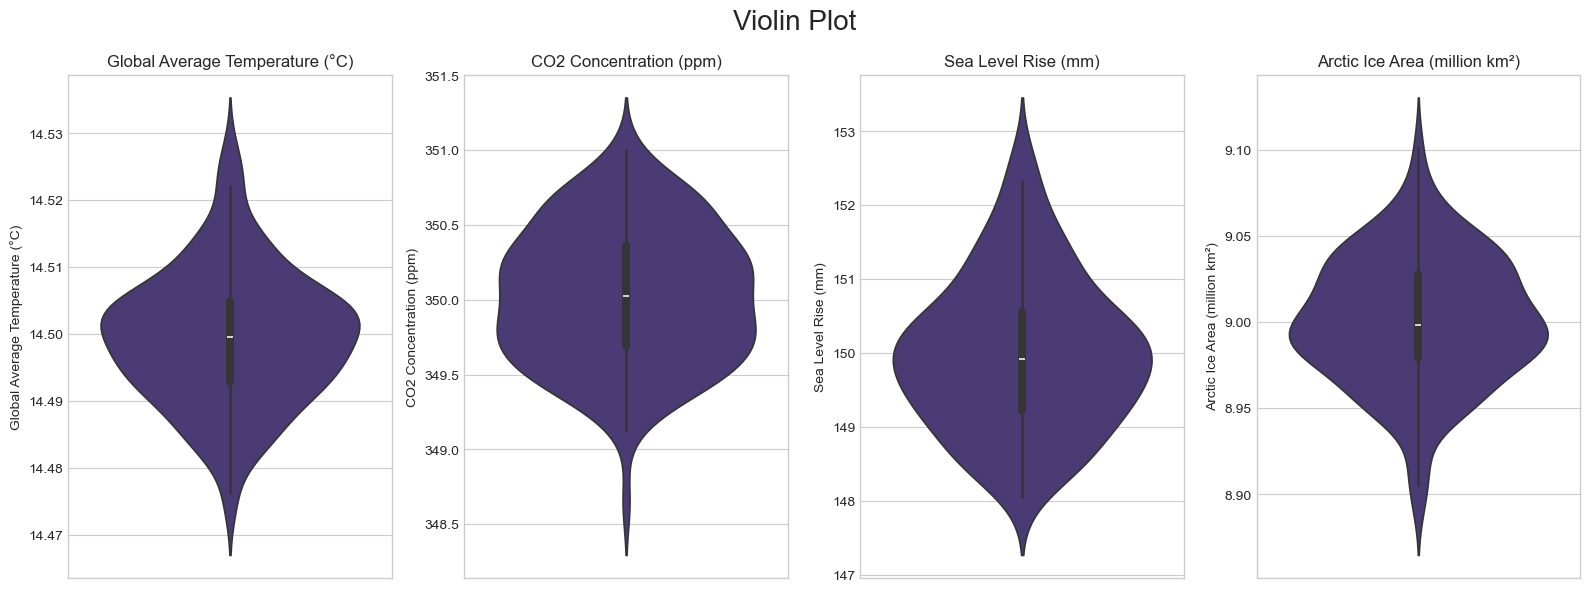

In [9]:
fig, axes = plt.subplots(1, num_columns, figsize=(16, 6))

for i, column in enumerate(df_selected.columns):
    sns.violinplot(data=df_selected[column], ax=axes[i])
    axes[i].set_title(column)

plt.suptitle("Violin Plot", fontsize=20)
plt.tight_layout()
plt.show()

---

## Stripplot

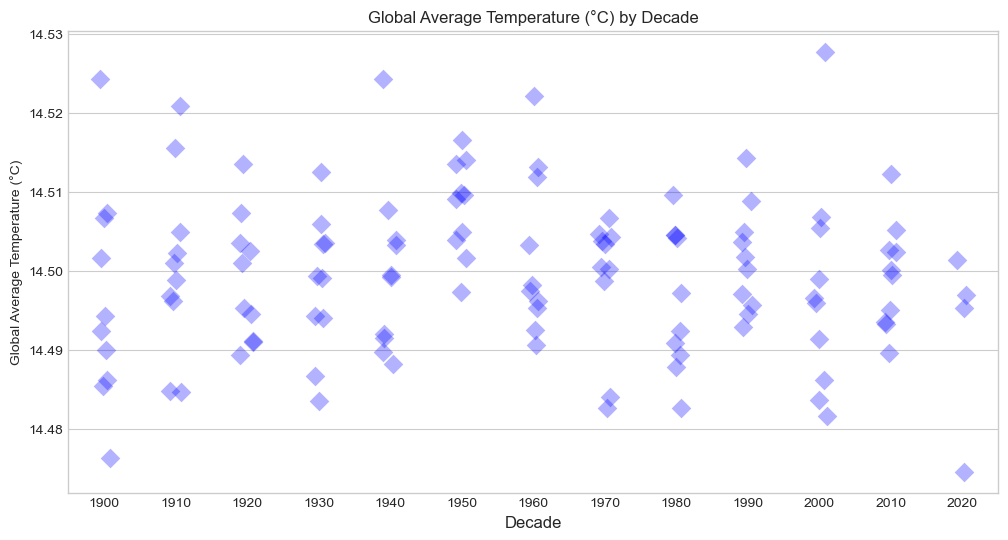

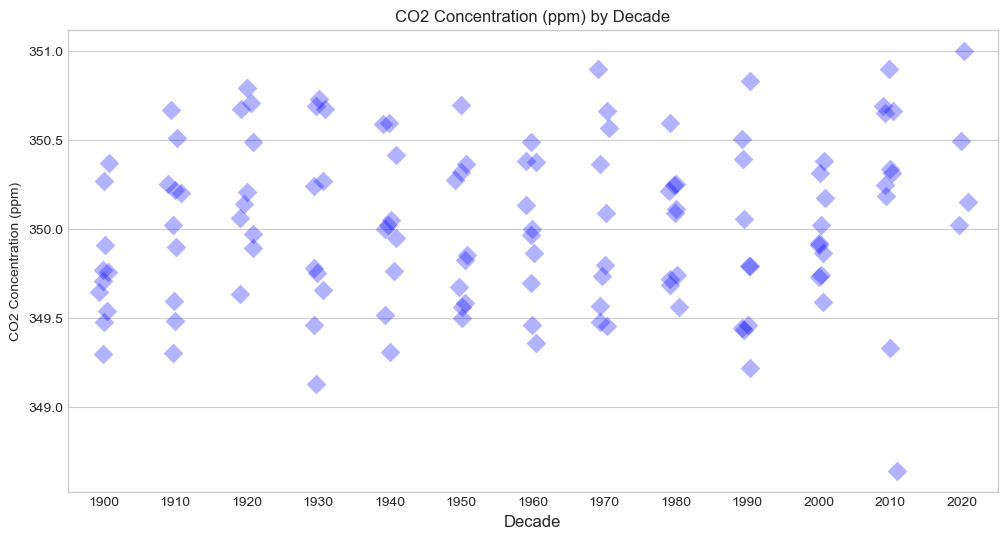

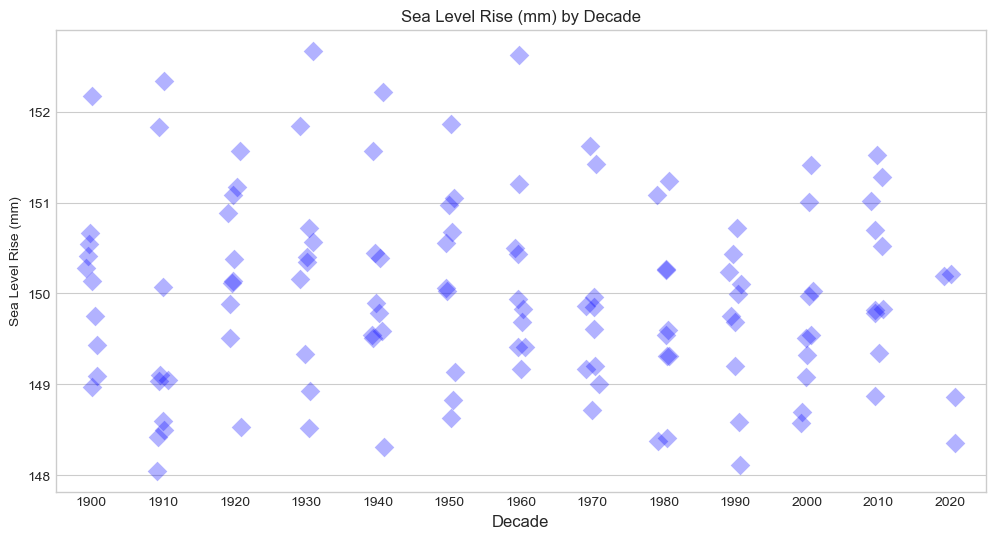

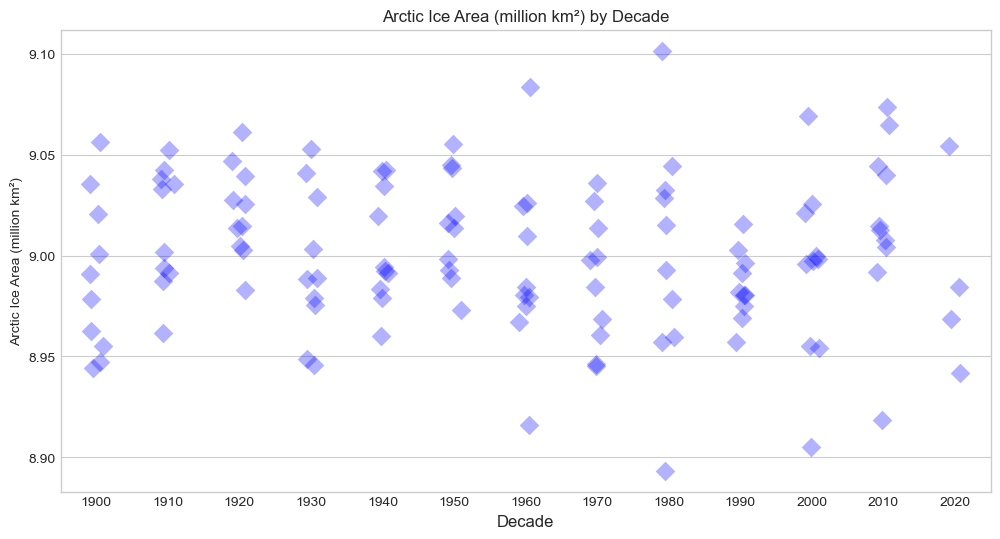

In [10]:
# Strip Plot:

df["Decade"] = (df["Year"] // 10) * 10

# Strip Plot for all  four columns:
for col in column_names:
    plt.figure(figsize=(12, 6))
    sns.stripplot(x=df["Decade"], y=df[col], color='blue', jitter=True, marker='D', s=10, alpha=0.3)
    plt.xlabel("Decade", fontsize=12)
    plt.ylabel(col)
    plt.title(f"{col} by Decade")
    plt.show()


## Time Plot

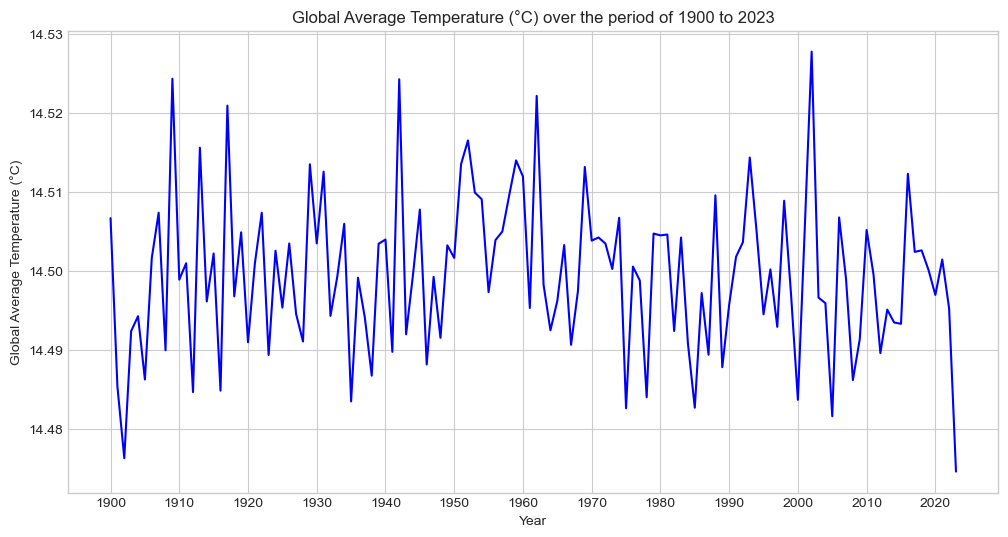

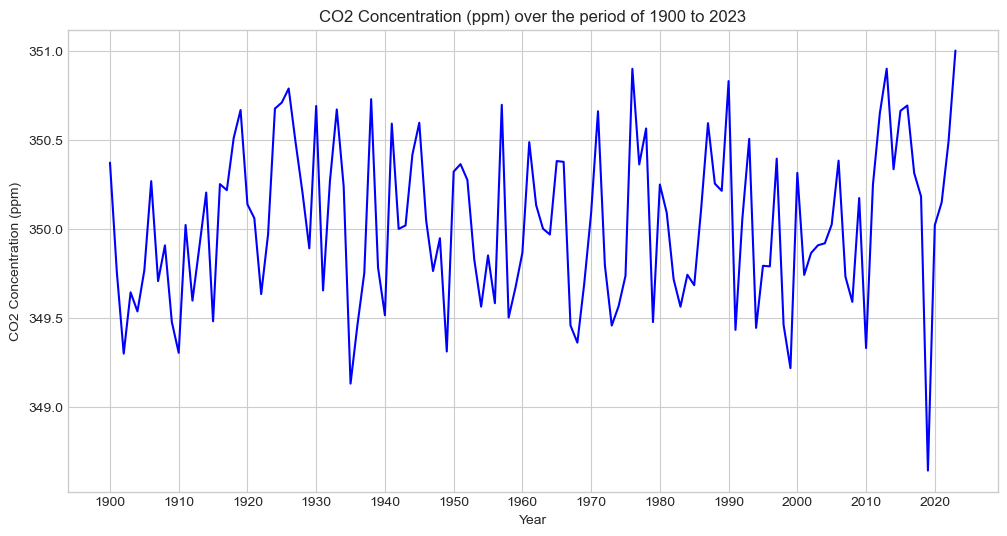

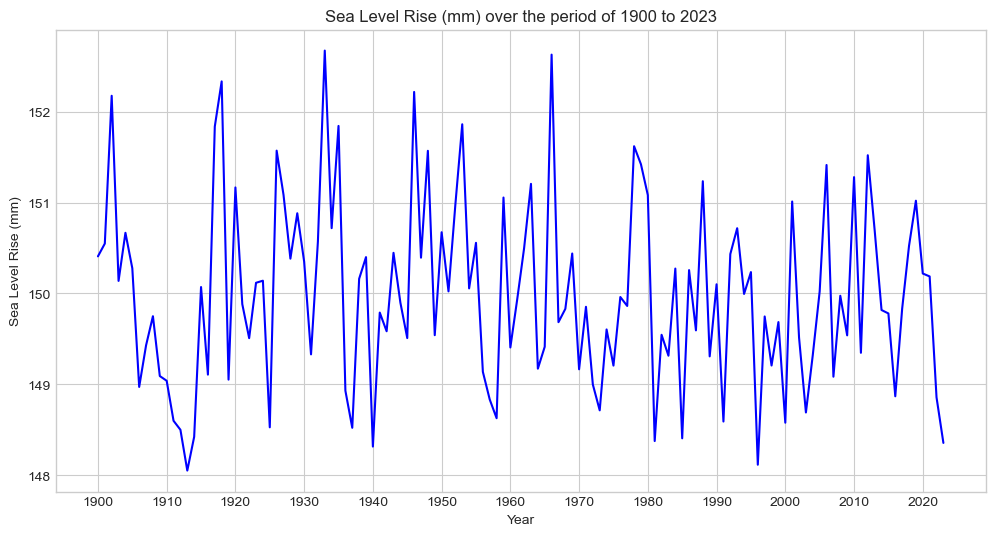

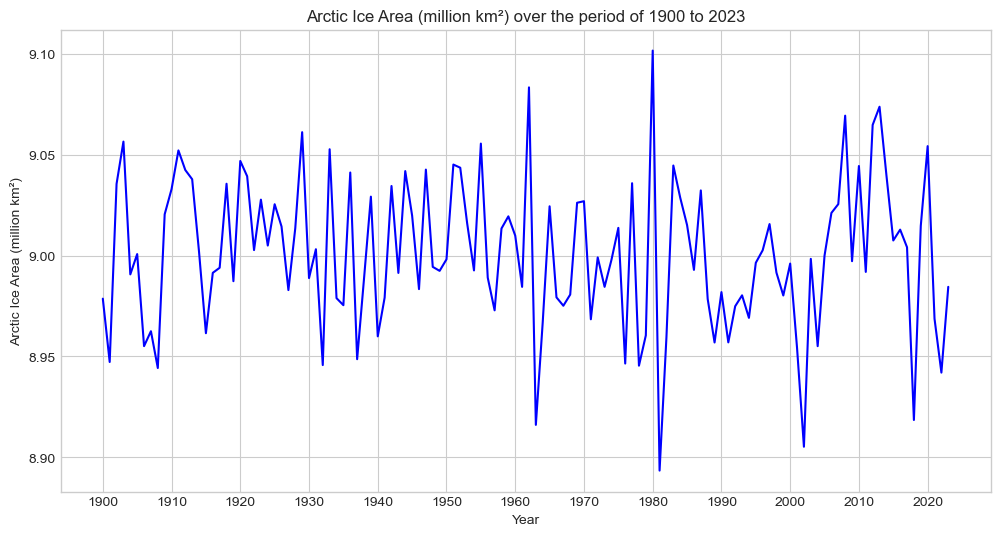

In [11]:
for col in column_names:
    plt.figure(figsize= (12, 6))
    sns.lineplot(df, x="Year", y=col, color='blue')
    plt.xticks(ticks=range(df["Year"].min(), df["Year"].max() + 1, 10))
    plt.xlabel("Year")
    plt.ylabel(col)
    plt.title(f"{col} over the period of {df["Year"].min()} to {df["Year"].max()}")
    plt.show()

---
---

# 3. Bivariate Analysis

## Correlation HeatMap

,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Global Average Temperature (°C),1.00,-0.07,0.00,0.05
CO2 Concentration (ppm),-0.07,1.00,0.10,0.01
Sea Level Rise (mm),0.00,0.10,1.00,0.13
Arctic Ice Area (million km²),0.05,0.01,0.13,1.00


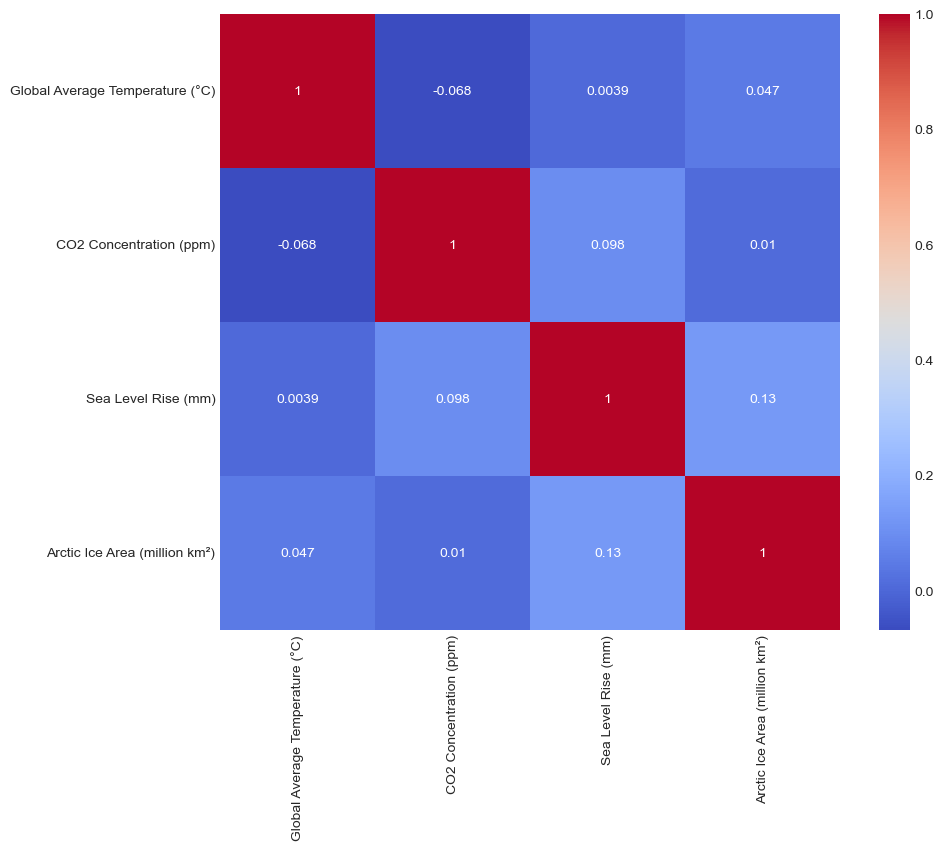

In [12]:
display(df[column_names].corr().round(2))

plt.figure(figsize=(10, 8))
sns.heatmap(df[column_names].corr(), annot=True, cmap="coolwarm")
plt.show()

---

## Scatter Plot

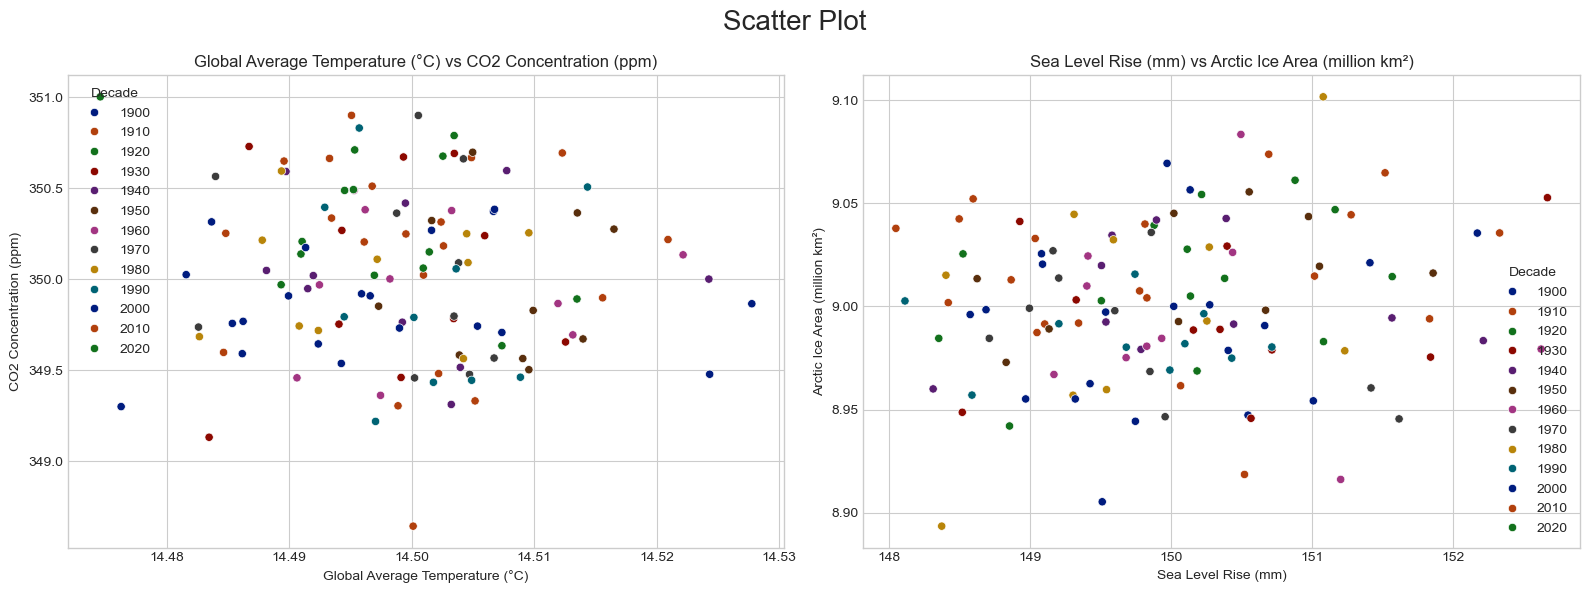

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.scatterplot(df, x=column_names[0], y=column_names[1], hue="Decade", palette="dark", markers='d', ax=axes[0])
axes[0].set_title(f"{column_names[0]} vs {column_names[1]}")

sns.scatterplot(df, x=column_names[2], y=column_names[3], hue="Decade", palette="dark", markers='d', ax=axes[1])
axes[1].set_title(f"{column_names[2]} vs {column_names[3]}")


plt.suptitle("Scatter Plot", fontsize=20)
plt.tight_layout()
plt.show()

---

## Line Plot: Temperature and Sea Level from 1990 to 2023

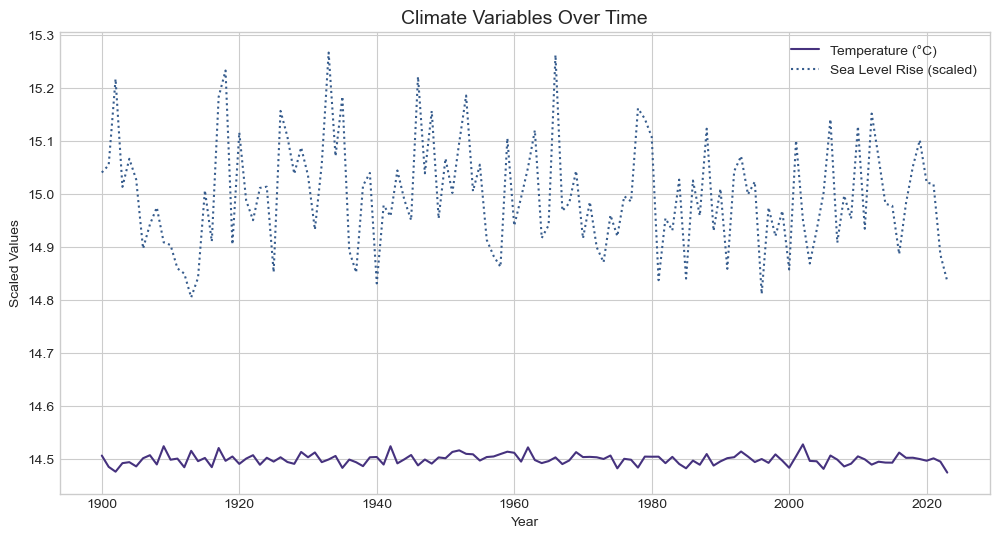

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Year"], y=df["Global Average Temperature (°C)"], label="Temperature (°C)")
sns.lineplot(x=df["Year"], y=df["Sea Level Rise (mm)"]/10, label="Sea Level Rise (scaled)", linestyle=":")
plt.title("Climate Variables Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Scaled Values")
plt.legend()
plt.grid(True)
plt.show()

---
---

## 4. Multivariate Analysis

## Pairplot

<Figure size 1000x800 with 0 Axes>

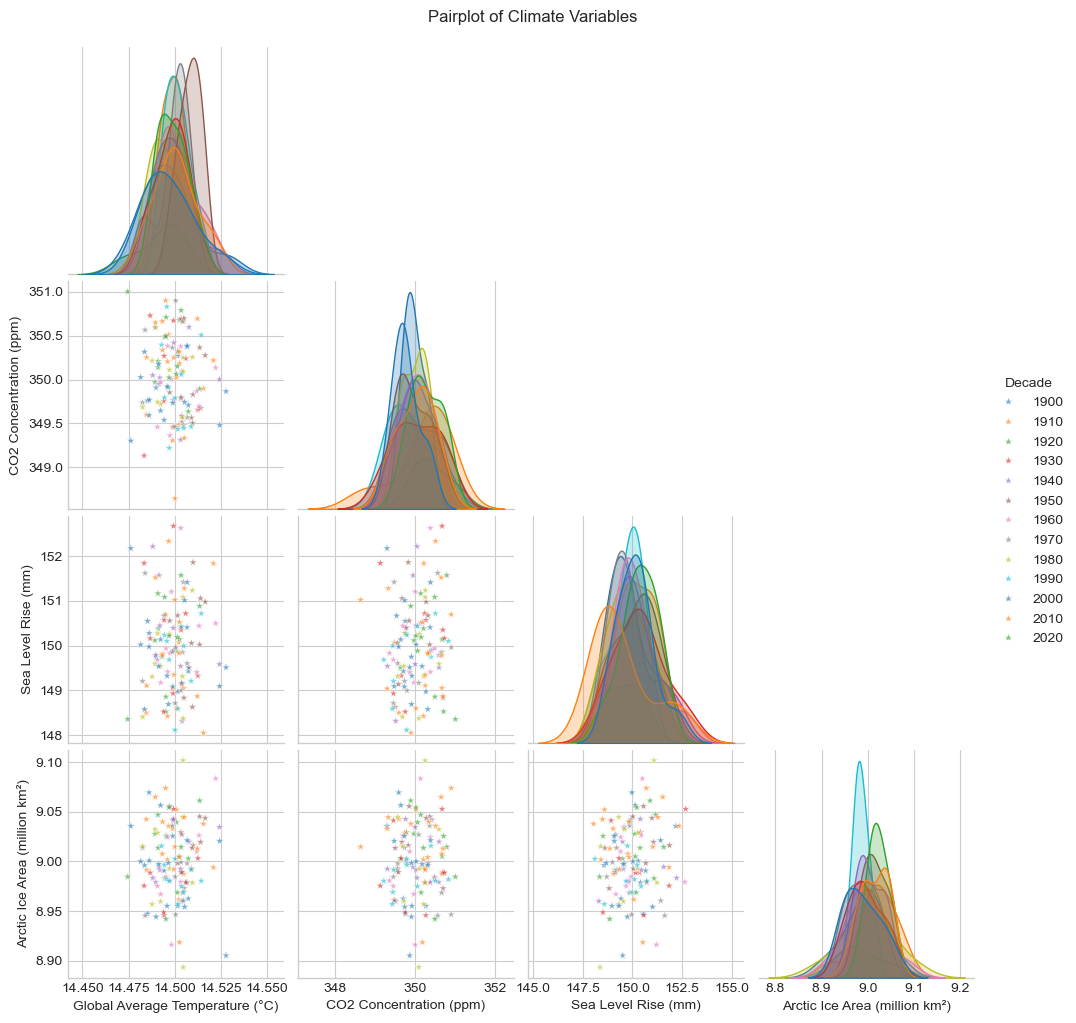

In [15]:
plt.figure(figsize= (10, 8))
sns.pairplot(df, vars=column_names, markers='*', hue="Decade", palette="tab10", diag_kind="kde", plot_kws={'alpha': 0.6},corner=True)

plt.suptitle("Pairplot of Climate Variables", y=1.02)
plt.show()

---

## 3D Plot

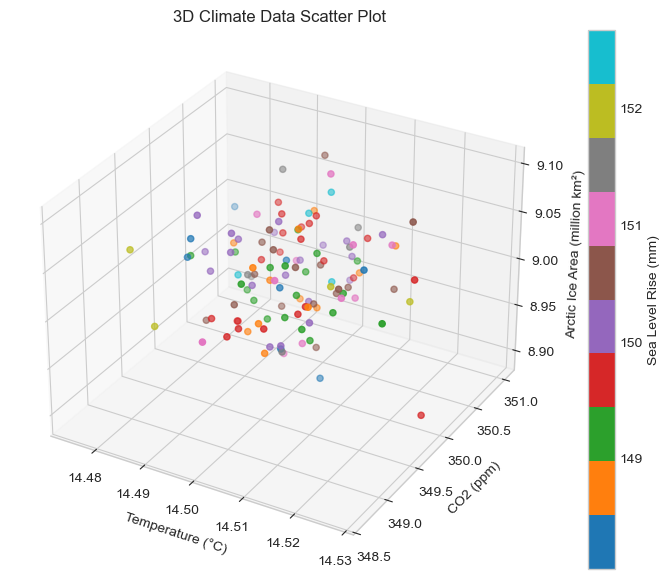

In [16]:
#3d plot between three climate variables
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
sc = ax.scatter(df['Global Average Temperature (°C)'], df['CO2 Concentration (ppm)'], 
                df['Arctic Ice Area (million km²)'], c=df['Sea Level Rise (mm)'], cmap='tab10')

# Labels
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('CO2 (ppm)')
ax.set_zlabel('Arctic Ice Area (million km²)')
ax.set_title('3D Climate Data Scatter Plot')

# Color bar for Sea Level Rise
cbar = fig.colorbar(sc, ax=ax, label='Sea Level Rise (mm)')

plt.show()

---
---

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

### **Insights**  

#### **Global Average Temperature (°C)**
- The temperature remains relatively **stable around 14.50°C** with **minimal fluctuations** (std = 0.01).
- No strong trend of increase or decrease is observed over time.

#### **CO2 Concentration (ppm)**
- CO2 levels fluctuate around **350 ppm** with a low standard deviation (std = 0.457).  
- Despite the weak correlation with temperature, **CO2 has shown a slight increasing trend over time**.

#### **Sea Level Rise (mm)**
- Sea levels range from **148 mm to 152.67 mm**, indicating a **gradual rising trend** over the years.
- The right-skewed distribution in the pair plot suggests **higher sea levels are becoming more frequent in recent years**.

#### **Arctic Ice Area (million km²)**
- Arctic Ice Area fluctuates between **8.89 to 9.10 million km²**, with a **slight decreasing trend over time**.
- A weak negative correlation with sea level rise suggests a **small but noticeable decline in Arctic ice**.

---

### **Comparative Insights**  

#### **Bivariate Analysis**  

- **Global Average Temperature vs. CO2 Concentration:**  
  - The **scatter plot shows widely spread data**, meaning **CO2 and temperature have a weak correlation (-0.07)**.  
  - This suggests that **other climatic factors may be influencing temperature variations** rather than just CO2.  

- **Sea Level Rise vs. Arctic Ice Area:**  
  - The correlation is **weak (0.13)**, indicating **a slight trend where sea levels rise while Arctic ice decreases**.
  - However, the effect is not dramatic, and **other environmental factors may play a role** in Arctic ice fluctuations.

#### **Multivariate Analysis**  

- **Pair Plot Analysis:**  
  - Most variable relationships appear **weakly correlated**, reinforcing the idea that climate patterns are influenced by **multiple factors beyond just these four**.  
  - The **density distributions suggest some shifting trends over decades**, with sea levels rising more frequently in recent years.  

- **3D Plot Analysis:**  
  - When analyzing **temperature, CO2, and Arctic ice together**, no strong trend is visible.  
  - However, considering real-world data, **CO2 and temperature do have a long-term relationship that may not be fully captured due to the small variation in this dataset**.

---

### **Key Takeaways**  

✔️ **Sea levels are gradually rising over time**, which could have **long-term impacts on coastal regions**.  
✔️ **Arctic Ice is slightly declining**, but the **rate of change is slow** in this dataset.  
✔️ **The weak correlation between CO2 and temperature suggests that other climate factors might be at play**.  
✔️ **Multivariate analysis shows that no single variable strongly dictates another**, reinforcing the complexity of climate systems.  
✔️ **Due to small data variations, the correlation values are weak**, meaning a **longer or more diverse dataset might reveal stronger trends**.  

---

### **Conclusion**  

This dataset suggests **gradual climate shifts** over the past 124 years, with **sea levels rising, Arctic ice slightly declining, and CO2 levels increasing over time**. However, the weak correlations indicate that **short-term variations do not fully capture the relationship between these climate variables**.  

From a **real-world perspective**, while this dataset does not strongly link **CO2 to temperature changes**, extensive research suggests that **long-term CO2 buildup leads to global warming**. The slight **decline in Arctic ice and rise in sea levels**, though not extreme in this data, **aligns with known climate trends** that could have **significant environmental and socio-economic impacts in the future**.  

To **enhance analysis**, expanding the dataset to **thousands of years or including additional climate factors** (such as greenhouse gases, ocean currents, and solar radiation) could provide **stronger correlations and deeper insights**.  

---
